# Teste Z para uma Amostra**

In [6]:
import numpy as np
import pandas as pd

In [7]:
enem_sp = pd.read_csv('enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [8]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [9]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35904958.0]

In [10]:
colegiox.shape

(130, 28)

In [11]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
1518,"1,90E+11",São Bernardo do Campo,17,F,1,preta,1,2,pública,35904958.0,...,584.8,Inglês,1.0,120.0,200.0,140.0,140.0,160.0,760.0,Sim
5093,"1,90E+11",São Bernardo do Campo,17,F,1,branca,1,2,pública,35904958.0,...,662.2,Inglês,1.0,140.0,140.0,140.0,140.0,120.0,680.0,Sim
6917,"1,90E+11",São Bernardo do Campo,17,F,1,parda,1,2,pública,35904958.0,...,687.5,Inglês,1.0,120.0,120.0,100.0,120.0,120.0,580.0,Sim
10196,"1,90E+11",São Bernardo do Campo,17,M,1,branca,1,2,pública,35904958.0,...,66.4,Inglês,1.0,160.0,200.0,180.0,180.0,200.0,920.0,Sim


1) Analisar a classificação das variáveis

In [12]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [13]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [14]:
import seaborn as sns

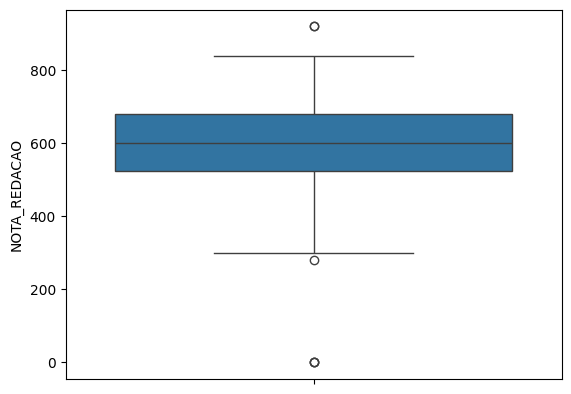

In [15]:
grafico = sns.boxplot(colegiox, y="NOTA_REDACAO")

4) Analisar Normalidade

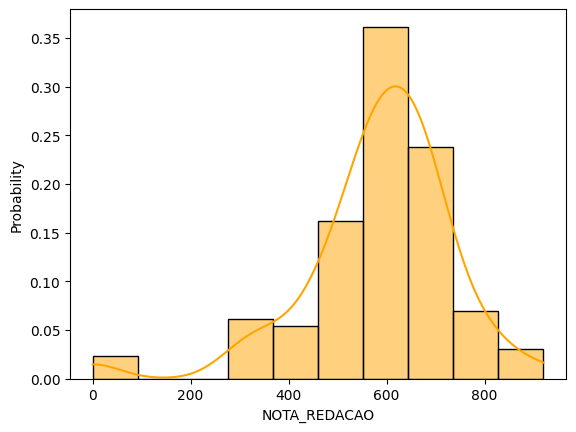

In [16]:
sns.histplot(colegiox, x='NOTA_REDACAO', bins=10, color="orange", kde=True, stat="probability");

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

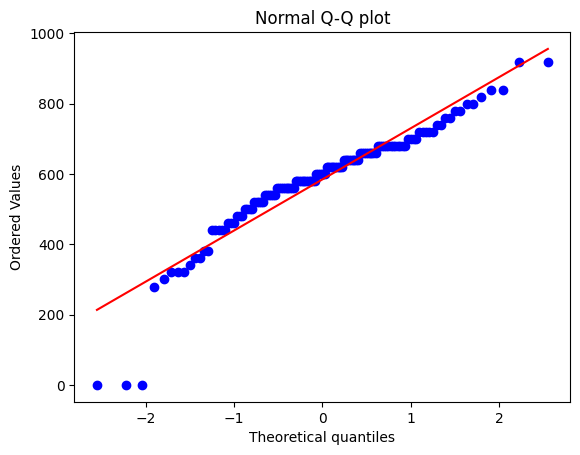

In [18]:
stats.probplot(colegiox['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [19]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox.NOTA_REDACAO)

ShapiroResult(statistic=np.float64(0.9056256770137878), pvalue=np.float64(1.555137026811932e-07))

In [20]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [21]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegiox.NOTA_REDACAO, dist = 'norm')

(np.float64(0.13495829388242486), np.float64(0.0009999999999998899))

In [22]:
# Teste Anderson-Darling
stats.anderson(colegiox.NOTA_REDACAO, 'norm')

AndersonResult(statistic=np.float64(2.8557927782960633), critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(584.7692307692307), scale=np.float64(151.24914188809242))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

## Teste Z

Média das notas do colégio X, comparada a média do Estado de São Paulo.

Ho = média é igual a de São Paulo : p > 0.05

Ha = média é diferente da de São Paulo : p <= 0.05

In [23]:
from statsmodels.stats.weightstats import ztest

In [24]:
enem_sp.NOTA_REDACAO.describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [25]:
stat, p = ztest(colegiox['NOTA_REDACAO'], value=593.0183221986639, )
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: -0.62
p-valor: 0.5340412252769843


In [26]:
colegiox.NOTA_REDACAO.describe()

count    130.000000
mean     584.769231
std      151.249142
min        0.000000
25%      525.000000
50%      600.000000
75%      680.000000
max      920.000000
Name: NOTA_REDACAO, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: z = -0.62

p_valor = 0.5340412252769843


